<a href="https://colab.research.google.com/github/nishant-jhaa/osteoarthritis-/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
images = "/content/drive/MyDrive/osteoarthritis/train"

In [4]:
folders = os.listdir(images)
print(folders)

['Osteoarthritis', 'Normal']


In [5]:
image_data= []
labels = []

In [7]:
label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

In [8]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [9]:
print(len(image_data),len(labels))

2350 2350


In [10]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350,)


In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350, 2)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

**Data Augmentation**

In [14]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [17]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="osteoarthritis_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 64)      

In [19]:
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 2.3491 - accuracy: 0.7196
Epoch 1: val_loss improved from inf to 2.06317, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 112s 2s/step - loss: 2.3491 - accuracy: 0.7196 - val_loss: 2.0632 - val_accuracy: 0.0000e+00
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 1.1574 - accuracy: 0.7305
Epoch 2: val_loss improved from 2.06317 to 1.25932, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 110s 2s/step - loss: 1.1574 - accuracy: 0.7305 - val_loss: 1.2593 - val_accuracy: 0.3532
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.8838 - accuracy: 0.7560
Epoch 3: val_loss improved from 1.25932 to 1.09575, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 111s 2s/step - loss: 0.8838 - accuracy: 0.7560 - val_loss: 1.0957 - val_accuracy: 0.5234
Epoch 4/30
67/67 [================

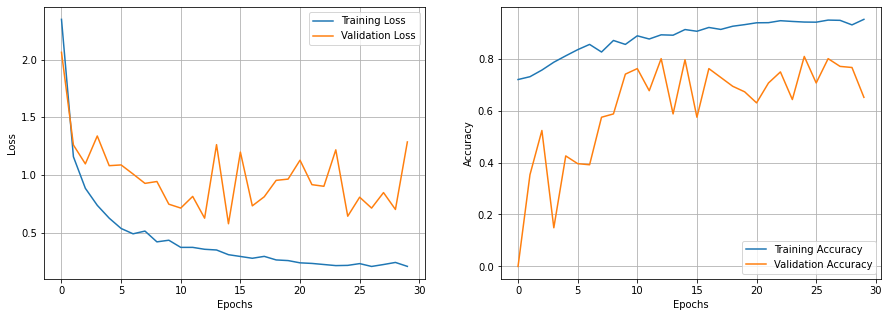

In [20]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("Figure 2 cnn.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("Figure 3 cnn.jpg")

In [21]:
model.evaluate(x_train,y_train)

74/74 [==============================] - 11s 141ms/step - loss: 0.2822 - accuracy: 0.9349


[0.2822156548500061, 0.9348936080932617]

**Testing the CNN on test**

In [24]:
test_images = "/content/drive/MyDrive/osteoarthritis/Valid"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['Normal', 'Osteoarthritis']
(651, 512, 512, 3) (651, 2)


In [25]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 3s 141ms/step - loss: 0.7144 - accuracy: 0.8203


[0.7143672108650208, 0.8202764987945557]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.48      0.64       220
           1       0.79      1.00      0.88       431

    accuracy                           0.82       651
   macro avg       0.88      0.74      0.76       651
weighted avg       0.85      0.82      0.80       651



In [28]:
print(confusion_matrix(test_labels, pred))

[[105 115]
 [  2 429]]


**VGG16 Model**

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [30]:
model_vgg = VGG16(include_top = False,weights = 'imagenet',input_shape = (512,512,3))
model_vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              

In [31]:
for ix in range(len(model_vgg.layers)):
    print(ix,model_vgg.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fd871cf6610>
1 <keras.layers.convolutional.Conv2D object at 0x7fd88a497050>
2 <keras.layers.convolutional.Conv2D object at 0x7fd89c572b90>
3 <keras.layers.pooling.MaxPooling2D object at 0x7fd89c4989d0>
4 <keras.layers.convolutional.Conv2D object at 0x7fd89c45b3d0>
5 <keras.layers.convolutional.Conv2D object at 0x7fd885d288d0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fd89c45b750>
7 <keras.layers.convolutional.Conv2D object at 0x7fd89c510c50>
8 <keras.layers.convolutional.Conv2D object at 0x7fd89c5107d0>
9 <keras.layers.convolutional.Conv2D object at 0x7fd89c544cd0>
10 <keras.layers.pooling.MaxPooling2D object at 0x7fd89c4bcb10>
11 <keras.layers.convolutional.Conv2D object at 0x7fd89c53e790>
12 <keras.layers.convolutional.Conv2D object at 0x7fd89c4811d0>
13 <keras.layers.convolutional.Conv2D object at 0x7fd89c53e490>
14 <keras.layers.pooling.MaxPooling2D object at 0x7fd89c55d550>
15 <keras.layers.convolutional.Conv2D object at 

In [32]:
for layer in model_vgg.layers[:15]:
    layer.trainable = False
for i, layer in enumerate(model_vgg.layers):
    print(i, layer.name, layer.trainable)
adam = Adam(learning_rate=0.00003)
model_vgg.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
model_vgg.summary()

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0       

In [33]:
av1 = Flatten()(model_vgg.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_new = Model(model_vgg.input,fc3)
model_new.summary()#final model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

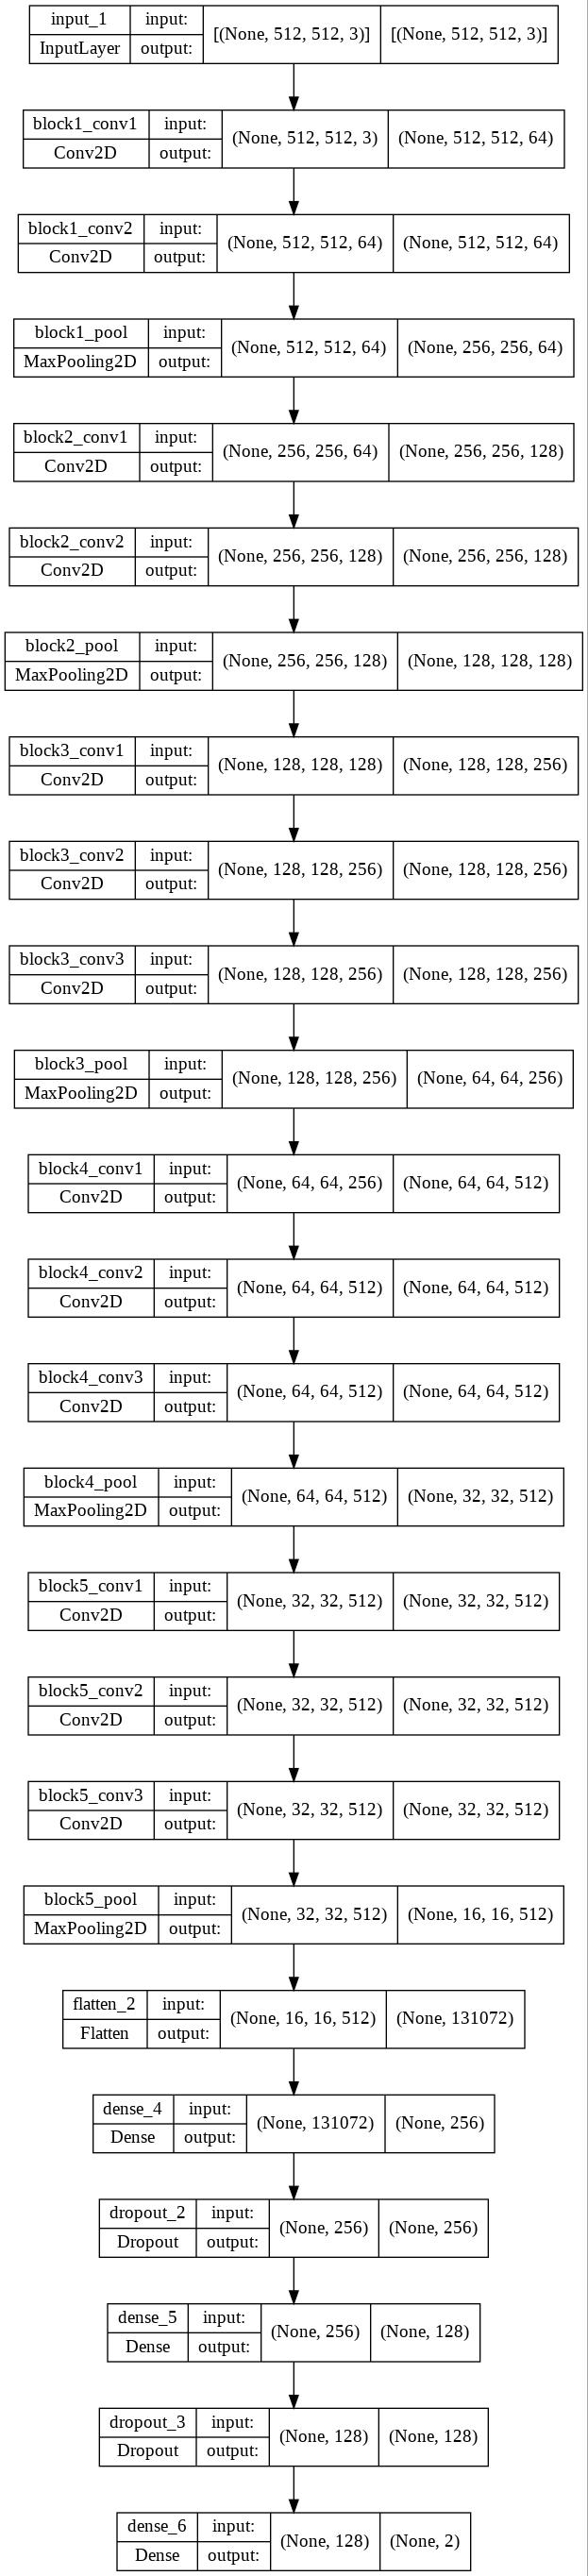

In [35]:
import tensorflow as tf
tf.keras.utils.plot_model(model_new, 'modelvgg.jpg', show_shapes= True)


In [34]:
adam = Adam(learning_rate=0.00001)
model_new.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="osteoarthritis_detection_vgg16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [36]:
hist = model_new.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 7.4912 - accuracy: 0.7291
Epoch 1: val_loss improved from inf to 7.10742, saving model to osteoarthritis_detection_vgg16.hdf5
67/67 [==============================] - 408s 6s/step - loss: 7.4912 - accuracy: 0.7291 - val_loss: 7.1074 - val_accuracy: 0.4596
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 6.4551 - accuracy: 0.8109
Epoch 2: val_loss improved from 7.10742 to 6.68751, saving model to osteoarthritis_detection_vgg16.hdf5
67/67 [==============================] - 403s 6s/step - loss: 6.4551 - accuracy: 0.8109 - val_loss: 6.6875 - val_accuracy: 0.4383
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 5.9190 - accuracy: 0.8662
Epoch 3: val_loss improved from 6.68751 to 6.18398, saving model to osteoarthritis_detection_vgg16.hdf5
67/67 [==============================] - 405s 6s/step - loss: 5.9190 - accuracy: 0.8662 - val_loss: 6.1840 - val_accuracy: 0.6170
Epoch 4/30
67/67 [==

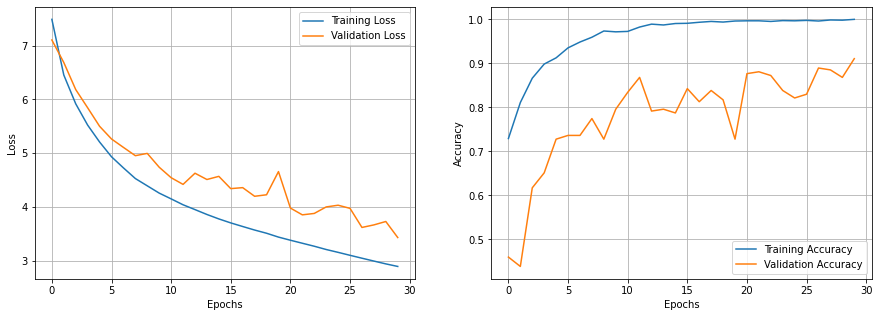

In [37]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("figure 4vgg.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure 5vgg.jpg")

In [38]:
model_new.evaluate(x_train,y_train)

74/74 [==============================] - 349s 5s/step - loss: 2.9082 - accuracy: 0.9911


[2.9081900119781494, 0.9910638332366943]

In [39]:
#performance testing vgg
model_new.evaluate(x_test,y_test)

21/21 [==============================] - 98s 5s/step - loss: 3.1929 - accuracy: 0.9217


[3.192888021469116, 0.921658992767334]

In [40]:
predictions = model_new.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       220
           1       0.90      1.00      0.94       431

    accuracy                           0.92       651
   macro avg       0.94      0.89      0.91       651
weighted avg       0.93      0.92      0.92       651



In [41]:
print(confusion_matrix(test_labels, pred))

[[170  50]
 [  1 430]]


Normalized Confusion Matrix: 
[[0.77 0.23]
 [0.   1.  ]]


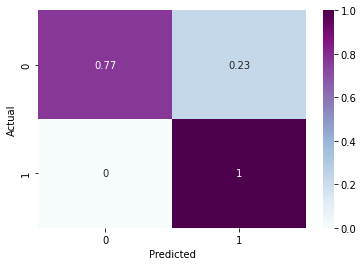

<Figure size 432x288 with 0 Axes>

In [43]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True, cmap = "BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("figure_vgg_matrix.jpg")

In [44]:
sensitivity1 = confusion_matrix(test_labels, pred)[0,0]/(confusion_matrix(test_labels, pred)[0,0]+confusion_matrix(test_labels, pred)[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.7727272727272727


In [45]:
specificity1 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9976798143851509


**ResNeT-50 Model**

In [46]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [47]:
model = ResNet50(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

94781440/94765736 [==============================] - 1s 0us/step


In [48]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [49]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fd88ad9c710>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7fd88ad9c890>
2 <keras.layers.convolutional.Conv2D object at 0x7fd88ae155d0>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd88ad27b90>
4 <keras.layers.core.activation.Activation object at 0x7fd89a00c350>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7fd88ad8cc10>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fd88ad47390>
7 <keras.layers.convolutional.Conv2D object at 0x7fd88ae15490>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd88ad4f3d0>
9 <keras.layers.core.activation.Activation object at 0x7fd88ace5f90>
10 <keras.layers.convolutional.Conv2D object at 0x7fd88ace5d50>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd88ace2890>
12 <keras.layers.core.activation.Activation object at 0x7fd88acfac50>
13 <keras.layers.convolutional.Conv2D object at 

In [50]:
for layer in model.layers[:169]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)
adam = Adam(learning_rate=0.00003)
model.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
model.summary()

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [51]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_resnet = Model(model.input,fc3)
model_resnet.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

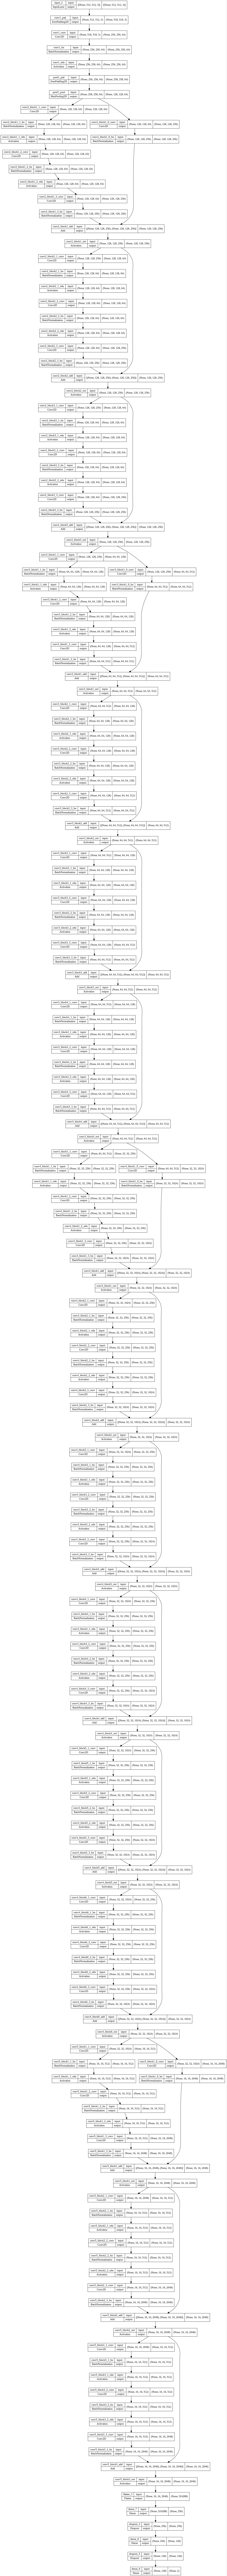

In [52]:
import tensorflow as tf
tf.keras.utils.plot_model(model_resnet, 'modelresnet.jpg', show_shapes= True)


In [53]:
adam = Adam(learning_rate=0.00001)
model_resnet.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])

In [54]:
filepath="osteoarthritis_detection_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [55]:
hist = model_resnet.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 7.0904 - accuracy: 0.7773
Epoch 1: val_loss improved from inf to 7.15378, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 189s 3s/step - loss: 7.0904 - accuracy: 0.7773 - val_loss: 7.1538 - val_accuracy: 0.4426
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 6.2619 - accuracy: 0.8790
Epoch 2: val_loss improved from 7.15378 to 6.25473, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 188s 3s/step - loss: 6.2619 - accuracy: 0.8790 - val_loss: 6.2547 - val_accuracy: 0.8000
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 5.7947 - accuracy: 0.8988
Epoch 3: val_loss improved from 6.25473 to 5.88363, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 197s 3s/step - loss: 5.7947 - accuracy: 0.8988 - val_loss: 5.8836 - val_accuracy: 0.7915
Epoch 4/30


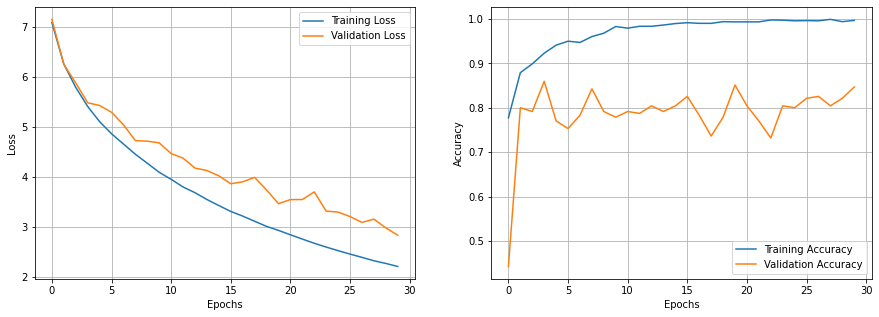

In [56]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("figure6 resnet.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure7 resnet.jpg")

In [57]:
model_resnet.evaluate(x_train,y_train)

74/74 [==============================] - 161s 2s/step - loss: 2.2235 - accuracy: 0.9847


[2.2235214710235596, 0.9846808314323425]

In [59]:
model_resnet.evaluate(x_test,y_test)#testing accuracy

21/21 [==============================] - 45s 2s/step - loss: 2.5253 - accuracy: 0.9063


[2.525287389755249, 0.9062979817390442]

In [60]:
predictions = model_resnet.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       220
           1       0.88      0.99      0.93       431

    accuracy                           0.91       651
   macro avg       0.93      0.86      0.89       651
weighted avg       0.91      0.91      0.90       651



In [61]:
print(confusion_matrix(test_labels, pred))

[[162  58]
 [  3 428]]


Normalized Confusion Matrix: 
[[0.74 0.26]
 [0.01 0.99]]


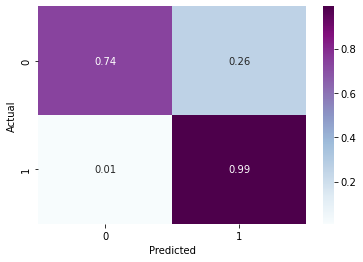

<Figure size 432x288 with 0 Axes>

In [62]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True, cmap = "BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("figure_resnet_matrix.jpg")

In [63]:
specificity2 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity2)

Specificity :  0.9930394431554525
